In [ ]:
import torch
import torch.nn as nn
import math

# Positional Embedding class (DETR-style)
class PositionEmbeddingSine(nn.Module):
    def __init__(self, num_pos_feats=128, temperature=10000, normalize=True, scale=2*math.pi):
        super().__init__()
        self.num_pos_feats = num_pos_feats
        self.temperature = temperature
        self.normalize = normalize
        self.scale = scale

    def forward(self, x):
        bs, c, h, w = x.shape
        mask = torch.zeros((bs, h, w), dtype=torch.bool, device=x.device)
        not_mask = ~mask
        y_embed = not_mask.cumsum(1, dtype=torch.float32)
        x_embed = not_mask.cumsum(2, dtype=torch.float32)

        if self.normalize:
            eps = 1e-6
            y_embed = y_embed / (y_embed[:, -1:, :] + eps) * self.scale
            x_embed = x_embed / (x_embed[:, :, -1:] + eps) * self.scale

        dim_t = torch.arange(self.num_pos_feats, dtype=torch.float32, device=x.device)
        dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)

        pos_x = x_embed[:, :, :, None] / dim_t
        pos_y = y_embed[:, :, :, None] / dim_t

        pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)

        pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)

        # Save full positional encodings for y and x for i = 0
        pos_y_encoding = pos_y[0].permute(2, 0, 1)  # [H, W, C] -> [C, H, W]
        pos_x_encoding = pos_x[0].permute(2, 0, 1)  # [H, W, C] -> [C, H, W]

        return pos, pos_y_encoding, pos_x_encoding

# Dummy input feature map [B, C, H, W]
dummy_feature_map = torch.randn(1, 256, 25, 45)
position_embedding = PositionEmbeddingSine(num_pos_feats=128, normalize=True)

# Forward pass to get positional encodings and separated x/y encodings
pos_embed, saved_pos_y, saved_pos_x = position_embedding(dummy_feature_map)

# Print outputs
print("Positional Embedding Shape:", pos_embed.shape)  # [1, 256, 25, 45]
print("Saved Positional Encoding y Shape:", saved_pos_y.shape)  # [128, 25, 45]
print("Saved Positional Encoding x Shape:", saved_pos_x.shape)  # [128, 25, 45]

print("Saved Positional Encoding y:\n", saved_pos_y)
print("--------------------------------------------------------------------------------")
print("Saved Positional Encoding x:\n", saved_pos_x)


Positional Embedding Shape: torch.Size([1, 256, 25, 45])
Saved Positional Encoding y Shape: torch.Size([128, 25, 45])
Saved Positional Encoding x Shape: torch.Size([128, 25, 45])
Saved Positional Encoding y:
 tensor([[[ 2.4869e-01,  2.4869e-01,  2.4869e-01,  ...,  2.4869e-01,
           2.4869e-01,  2.4869e-01],
         [ 4.8175e-01,  4.8175e-01,  4.8175e-01,  ...,  4.8175e-01,
           4.8175e-01,  4.8175e-01],
         [ 6.8455e-01,  6.8455e-01,  6.8455e-01,  ...,  6.8455e-01,
           6.8455e-01,  6.8455e-01],
         ...,
         [-4.8175e-01, -4.8175e-01, -4.8175e-01,  ..., -4.8175e-01,
          -4.8175e-01, -4.8175e-01],
         [-2.4869e-01, -2.4869e-01, -2.4869e-01,  ..., -2.4869e-01,
          -2.4869e-01, -2.4869e-01],
         [-3.0199e-07, -3.0199e-07, -3.0199e-07,  ..., -3.0199e-07,
          -3.0199e-07, -3.0199e-07]],

        [[ 9.6858e-01,  9.6858e-01,  9.6858e-01,  ...,  9.6858e-01,
           9.6858e-01,  9.6858e-01],
         [ 8.7631e-01,  8.7631e-01,  8.7

Embedding vector for first position (0):
tensor([2.4869e-01, 9.6858e-01, 2.1593e-01, 9.7641e-01, 1.8736e-01, 9.8229e-01,
        1.6248e-01, 9.8671e-01, 1.4086e-01, 9.9003e-01, 1.2208e-01, 9.9252e-01,
        1.0579e-01, 9.9439e-01, 9.1649e-02, 9.9579e-01, 7.9393e-02, 9.9684e-01,
        6.8770e-02, 9.9763e-01, 5.9564e-02, 9.9822e-01, 5.1588e-02, 9.9867e-01,
        4.4678e-02, 9.9900e-01, 3.8693e-02, 9.9925e-01, 3.3509e-02, 9.9944e-01,
        2.9019e-02, 9.9958e-01, 2.5130e-02, 9.9968e-01, 2.1762e-02, 9.9976e-01,
        1.8846e-02, 9.9982e-01, 1.6320e-02, 9.9987e-01, 1.4133e-02, 9.9990e-01,
        1.2239e-02, 9.9993e-01, 1.0598e-02, 9.9994e-01, 9.1777e-03, 9.9996e-01,
        7.9476e-03, 9.9997e-01, 6.8823e-03, 9.9998e-01, 5.9599e-03, 9.9998e-01,
        5.1610e-03, 9.9999e-01, 4.4693e-03, 9.9999e-01, 3.8702e-03, 9.9999e-01,
        3.3515e-03, 9.9999e-01, 2.9023e-03, 1.0000e+00, 2.5133e-03, 1.0000e+00,
        2.1764e-03, 1.0000e+00, 1.8847e-03, 1.0000e+00, 1.6321e-03, 1.0000e+00,

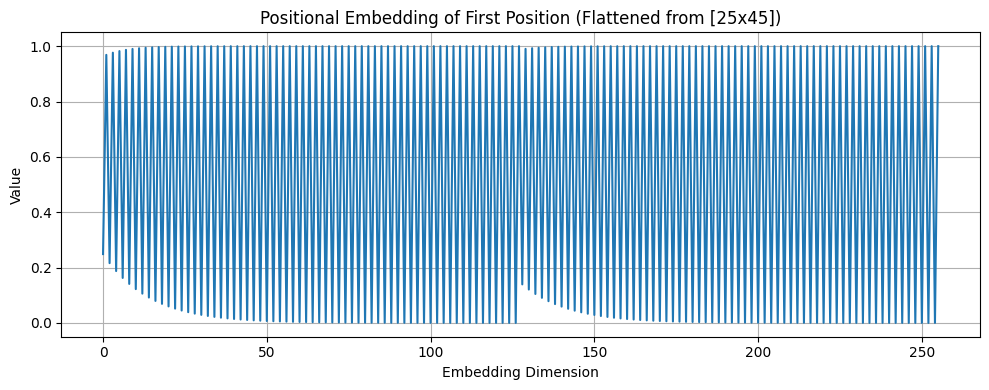

In [ ]:
import torch
import matplotlib.pyplot as plt

# Example tensor
# pos_embed = your actual tensor with shape [1, 256, 25, 45]

# Flatten spatial dimensions: [1, 256, 25*45] → then transpose to [1, 1125, 256]
flattened = pos_embed.view(1, 256, -1).permute(0, 2, 1).squeeze(0)  # Shape: [1125, 256]

# Now each row is a position embedding: flattened[i] → shape [256]
first_position = flattened[0]  # First of the 1125 positions

# Print first embedding
print("Embedding vector for first position (0):")
print(first_position)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(first_position.numpy())
plt.title("Positional Embedding of First Position (Flattened from [25x45])")
plt.xlabel("Embedding Dimension")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Extract and save the 1st channel (channel 0) from the positional encoding
first_channel_y = saved_pos_y[0]  # shape: [25, 45]
first_channel_x = saved_pos_x[0]  # shape: [25, 45]


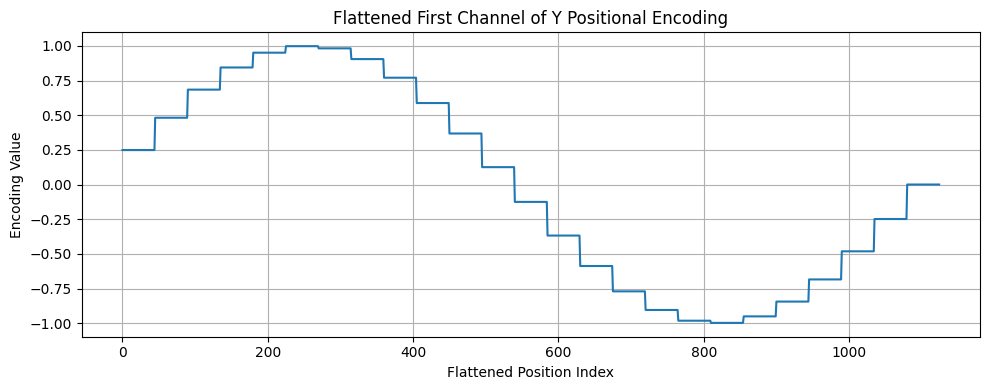

In [ ]:
import matplotlib.pyplot as plt

# Flatten the tensor
flattened_y = first_channel_y.flatten()  # shape: [1125]

# Convert to numpy for plotting
flattened_y_np = flattened_y.cpu().numpy()

# Plot as a line graph
plt.figure(figsize=(10, 4))
plt.plot(flattened_y_np)
plt.title("Flattened First Channel of Y Positional Encoding")
plt.xlabel("Flattened Position Index")
plt.ylabel("Encoding Value")
plt.grid(True)
plt.tight_layout()
plt.show()


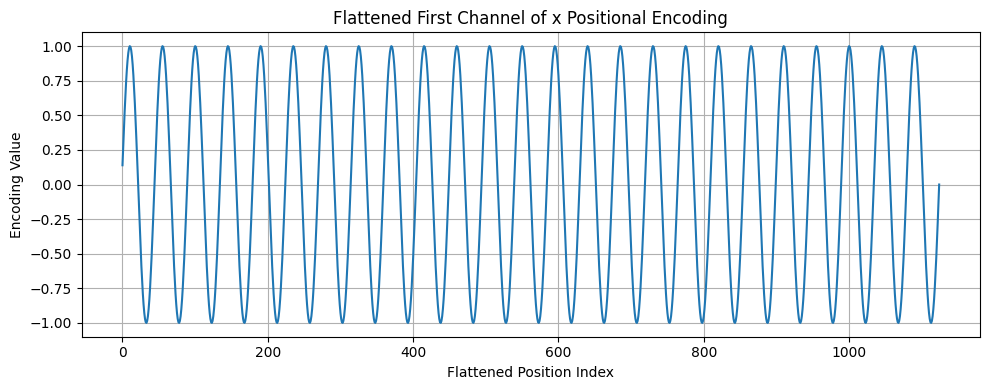

In [ ]:
import matplotlib.pyplot as plt

# Flatten the tensor
flattened_x = first_channel_x.flatten()  # shape: [1125]

# Convert to numpy for plotting
flattened_x_np = flattened_x.cpu().numpy()

# Plot as a line graph
plt.figure(figsize=(10, 4))
plt.plot(flattened_x_np)
plt.title("Flattened First Channel of x Positional Encoding")
plt.xlabel("Flattened Position Index")
plt.ylabel("Encoding Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
trans_pe = pos_embed.flatten(2).permute(2, 0, 1)
print("trans_pe shape:", trans_pe.shape)
print(trans_pe)

trans_pe shape: torch.Size([1125, 1, 256])
tensor([[[ 2.4869e-01,  9.6858e-01,  2.1593e-01,  ...,  1.0000e+00,
           1.6124e-05,  1.0000e+00]],

        [[ 2.4869e-01,  9.6858e-01,  2.1593e-01,  ...,  1.0000e+00,
           3.2248e-05,  1.0000e+00]],

        [[ 2.4869e-01,  9.6858e-01,  2.1593e-01,  ...,  1.0000e+00,
           4.8371e-05,  1.0000e+00]],

        ...,

        [[-3.0199e-07,  1.0000e+00, -7.4609e-01,  ...,  1.0000e+00,
           6.9332e-04,  1.0000e+00]],

        [[-3.0199e-07,  1.0000e+00, -7.4609e-01,  ...,  1.0000e+00,
           7.0945e-04,  1.0000e+00]],

        [[-3.0199e-07,  1.0000e+00, -7.4609e-01,  ...,  1.0000e+00,
           7.2557e-04,  1.0000e+00]]])


0th row of trans_pe:
tensor([2.4869e-01, 9.6858e-01, 2.1593e-01, 9.7641e-01, 1.8736e-01, 9.8229e-01,
        1.6248e-01, 9.8671e-01, 1.4086e-01, 9.9003e-01, 1.2208e-01, 9.9252e-01,
        1.0579e-01, 9.9439e-01, 9.1649e-02, 9.9579e-01, 7.9393e-02, 9.9684e-01,
        6.8770e-02, 9.9763e-01, 5.9564e-02, 9.9822e-01, 5.1588e-02, 9.9867e-01,
        4.4678e-02, 9.9900e-01, 3.8693e-02, 9.9925e-01, 3.3509e-02, 9.9944e-01,
        2.9019e-02, 9.9958e-01, 2.5130e-02, 9.9968e-01, 2.1762e-02, 9.9976e-01,
        1.8846e-02, 9.9982e-01, 1.6320e-02, 9.9987e-01, 1.4133e-02, 9.9990e-01,
        1.2239e-02, 9.9993e-01, 1.0598e-02, 9.9994e-01, 9.1777e-03, 9.9996e-01,
        7.9476e-03, 9.9997e-01, 6.8823e-03, 9.9998e-01, 5.9599e-03, 9.9998e-01,
        5.1610e-03, 9.9999e-01, 4.4693e-03, 9.9999e-01, 3.8702e-03, 9.9999e-01,
        3.3515e-03, 9.9999e-01, 2.9023e-03, 1.0000e+00, 2.5133e-03, 1.0000e+00,
        2.1764e-03, 1.0000e+00, 1.8847e-03, 1.0000e+00, 1.6321e-03, 1.0000e+00,
        1.4133e-03,

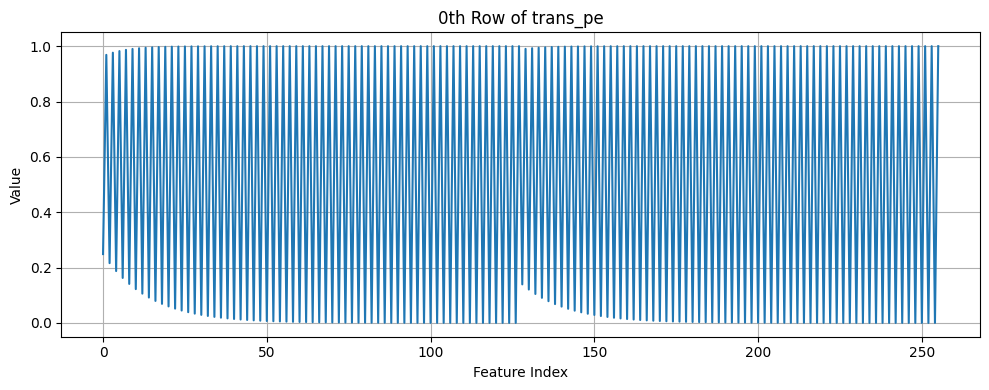

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming this is your actual tensor
# Shape: [1125, 1, 256]
# trans_pe = your tensor here

# Extract first row
first_row = trans_pe[0, 0, :]  # Shape: [256]

# Print it
print("0th row of trans_pe:")
print(first_row)

# Plot it
plt.figure(figsize=(10, 4))
plt.plot(first_row.numpy())
plt.title("0th Row of trans_pe")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


563th row of trans_pe:
tensor([-1.2533e-01, -9.9211e-01,  3.0721e-01, -9.5164e-01,  6.3769e-01,
        -7.7029e-01,  8.5205e-01, -5.2345e-01,  9.6469e-01, -2.6337e-01,
         9.9979e-01, -2.0250e-02,  9.8143e-01,  1.9181e-01,  9.2952e-01,
         3.6876e-01,  8.5894e-01,  5.1208e-01,  7.8003e-01,  6.2574e-01,
         6.9956e-01,  7.1457e-01,  6.2172e-01,  7.8324e-01,  5.4887e-01,
         8.3591e-01,  4.8217e-01,  8.7608e-01,  4.2204e-01,  9.0658e-01,
         3.6841e-01,  9.2966e-01,  3.2094e-01,  9.4710e-01,  2.7917e-01,
         9.6024e-01,  2.4257e-01,  9.7013e-01,  2.1058e-01,  9.7758e-01,
         1.8270e-01,  9.8317e-01,  1.5843e-01,  9.8737e-01,  1.3734e-01,
         9.9052e-01,  1.1903e-01,  9.9289e-01,  1.0314e-01,  9.9467e-01,
         8.9352e-02,  9.9600e-01,  7.7401e-02,  9.9700e-01,  6.7044e-02,
         9.9775e-01,  5.8068e-02,  9.9831e-01,  5.0292e-02,  9.9873e-01,
         4.3556e-02,  9.9905e-01,  3.7721e-02,  9.9929e-01,  3.2667e-02,
         9.9947e-01,  2.8289

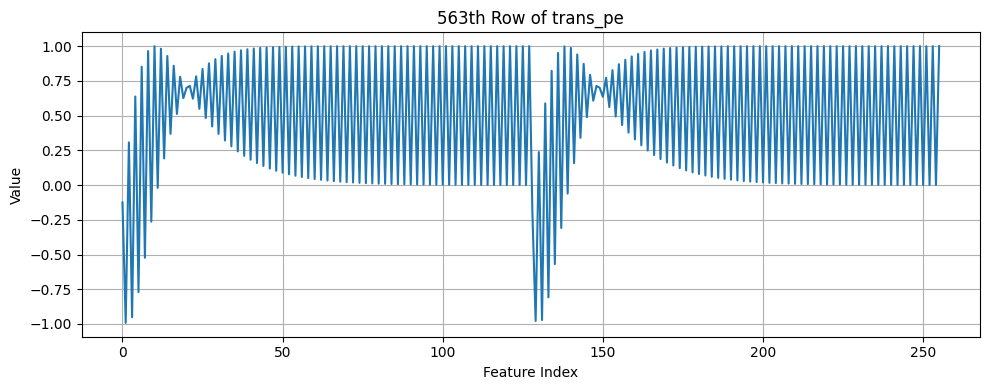

In [ ]:
import torch
import matplotlib.pyplot as plt




row_index = 563
selected_row = trans_pe[row_index, 0, :]  # Shape: [256]

# Print it
print(f"{row_index}th row of trans_pe:")
print(selected_row)

# Plot it
plt.figure(figsize=(10, 4))
plt.plot(selected_row.numpy())
plt.title(f"{row_index}th Row of trans_pe")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


563th row of trans_pe:
tensor([-1.2533e-01, -9.9211e-01,  3.0721e-01, -9.5164e-01,  6.3769e-01,
        -7.7029e-01,  8.5205e-01, -5.2345e-01,  9.6469e-01, -2.6337e-01,
         9.9979e-01, -2.0250e-02,  9.8143e-01,  1.9181e-01,  9.2952e-01,
         3.6876e-01,  8.5894e-01,  5.1208e-01,  7.8003e-01,  6.2574e-01,
         6.9956e-01,  7.1457e-01,  6.2172e-01,  7.8324e-01,  5.4887e-01,
         8.3591e-01,  4.8217e-01,  8.7608e-01,  4.2204e-01,  9.0658e-01,
         3.6841e-01,  9.2966e-01,  3.2094e-01,  9.4710e-01,  2.7917e-01,
         9.6024e-01,  2.4257e-01,  9.7013e-01,  2.1058e-01,  9.7758e-01,
         1.8270e-01,  9.8317e-01,  1.5843e-01,  9.8737e-01,  1.3734e-01,
         9.9052e-01,  1.1903e-01,  9.9289e-01,  1.0314e-01,  9.9467e-01,
         8.9352e-02,  9.9600e-01,  7.7401e-02,  9.9700e-01,  6.7044e-02,
         9.9775e-01,  5.8068e-02,  9.9831e-01,  5.0292e-02,  9.9873e-01,
         4.3556e-02,  9.9905e-01,  3.7721e-02,  9.9929e-01,  3.2667e-02,
         9.9947e-01,  2.8289

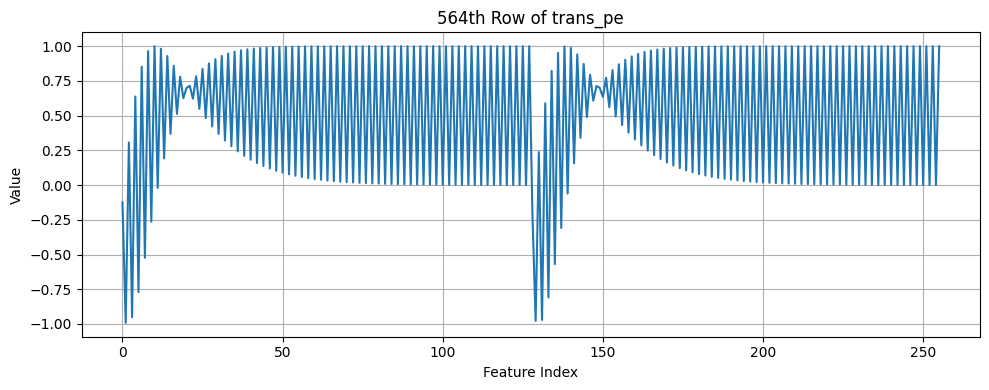

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming trans_pe is your tensor of shape [1125, 1, 256]


row_index = 563
selected_row = trans_pe[row_index, 0, :]  # Shape: [256]

# Print it
print(f"{row_index}th row of trans_pe:")
print(selected_row)

# Plot it
plt.figure(figsize=(10, 4))
plt.plot(selected_row.numpy())
plt.title(f"{row_index+1}th Row of trans_pe")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
concatenated_pe = torch.cat((flattened_y, flattened_x), dim=0)  # Shape: [N, D_y + D_x]
print(concatenated_pe)

tensor([ 2.4869e-01,  2.4869e-01,  2.4869e-01,  ..., -2.7564e-01,
        -1.3917e-01,  1.7485e-07])


In [ ]:
print(concatenated_pe.shape)

torch.Size([2250])


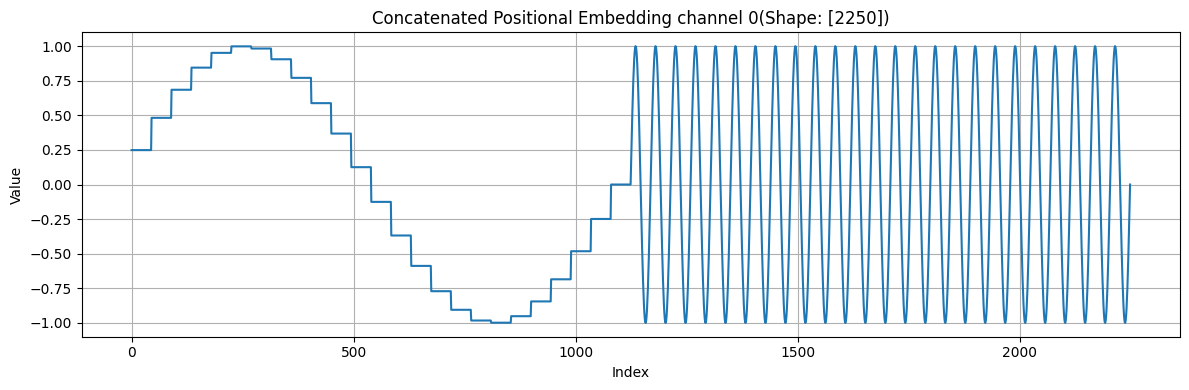

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(concatenated_pe.numpy())
plt.title("Concatenated Positional Embedding channel 0(Shape: [2250])")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

channel64_y = saved_pos_y[63]  # shape: [25, 45]
channel64_x = saved_pos_x[63]  # shape: [25, 45]

In [ ]:

channel127_y = saved_pos_y[127]  # shape: [25, 45]
channel127_x = saved_pos_x[127]  # shape: [25, 45]

tensor([1.0000, 1.0000, 1.0000,  ..., 0.9974, 0.9974, 0.9974])


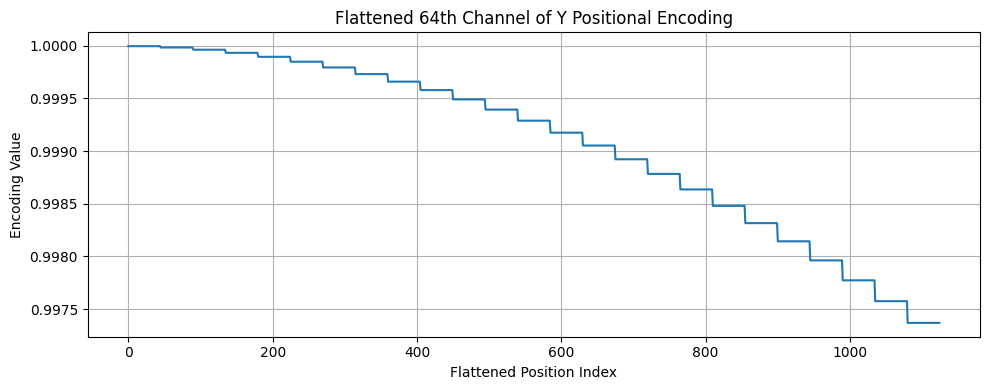

In [ ]:
import matplotlib.pyplot as plt

# Flatten the tensor
flattened64_y = channel64_y.flatten()  # shape: [1125]

# Convert to numpy for plotting
flattened64_y_np = flattened64_y.cpu().numpy()

print(flattened64_y)
# Plot as a line graph
plt.figure(figsize=(10, 4))
plt.plot(flattened64_y_np)
plt.title("Flattened 64th Channel of Y Positional Encoding")
plt.xlabel("Flattened Position Index")
plt.ylabel("Encoding Value")
plt.grid(True)
plt.tight_layout()
plt.show()

tensor([1.0000, 1.0000, 1.0000,  ..., 0.9974, 0.9974, 0.9974])


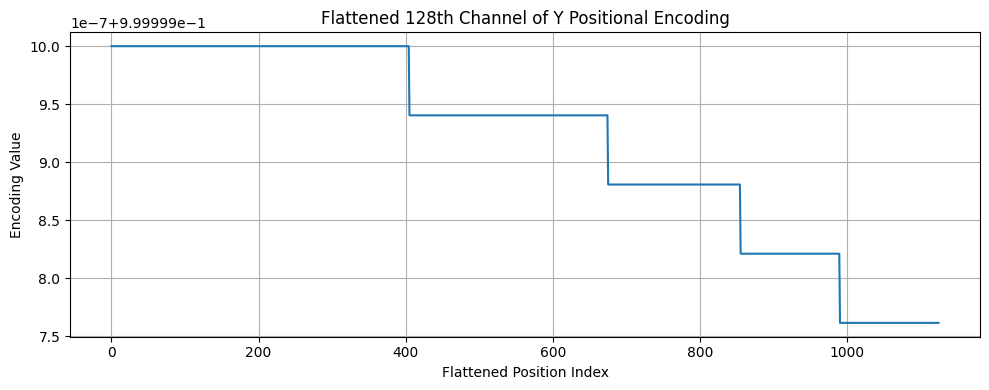

In [ ]:
import matplotlib.pyplot as plt

# Flatten the tensor
flattened127_y = channel127_y.flatten()  # shape: [1125]

# Convert to numpy for plotting
flattened127_y_np = flattened127_y.cpu().numpy()

print(flattened64_y)
# Plot as a line graph
plt.figure(figsize=(10, 4))
plt.plot(flattened127_y_np)
plt.title("Flattened 128th Channel of Y Positional Encoding")
plt.xlabel("Flattened Position Index")
plt.ylabel("Encoding Value")
plt.grid(True)
plt.tight_layout()
plt.show()

tensor([1.0000, 1.0000, 1.0000,  ..., 0.9976, 0.9975, 0.9974])


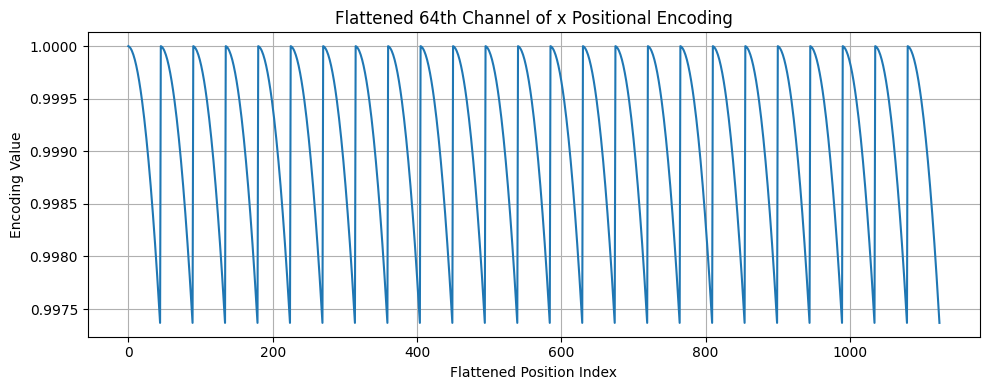

In [ ]:
import matplotlib.pyplot as plt

# Flatten the tensor
flattened64_x = channel64_x.flatten()  # shape: [1125]

# Convert to numpy for plotting
flattened64_x_np = flattened64_x.cpu().numpy()

print(flattened64_x)
# Plot as a line graph
plt.figure(figsize=(10, 4))
plt.plot(flattened64_x_np)
plt.title("Flattened 64th Channel of x Positional Encoding")
plt.xlabel("Flattened Position Index")
plt.ylabel("Encoding Value")
plt.grid(True)
plt.tight_layout()
plt.show()

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])


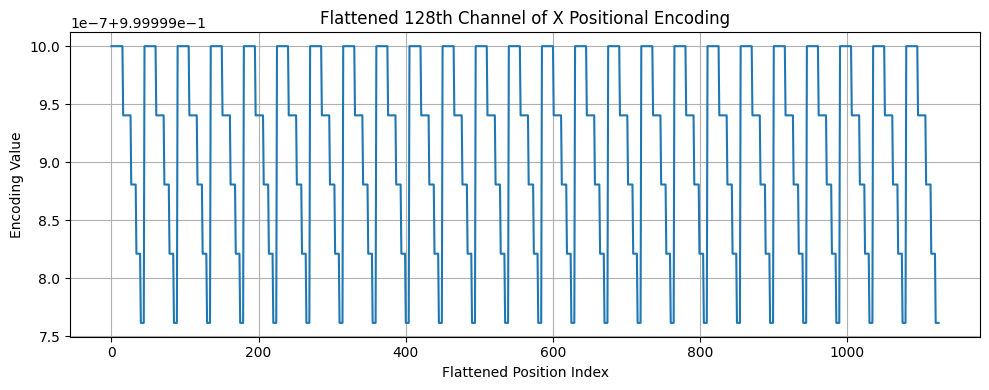

In [ ]:
import matplotlib.pyplot as plt

# Flatten the tensor
flattened127_x = channel127_x.flatten()  # shape: [1125]

# Convert to numpy for plotting
flattened127_x_np = flattened127_x.cpu().numpy()

print(flattened127_x)
# Plot as a line graph
plt.figure(figsize=(10, 4))
plt.plot(flattened127_x_np)
plt.title("Flattened 128th Channel of X Positional Encoding")
plt.xlabel("Flattened Position Index")
plt.ylabel("Encoding Value")
plt.grid(True)
plt.tight_layout()
plt.show()

tensor([1.0000, 1.0000, 1.0000,  ..., 0.9976, 0.9975, 0.9974])
torch.Size([2250])


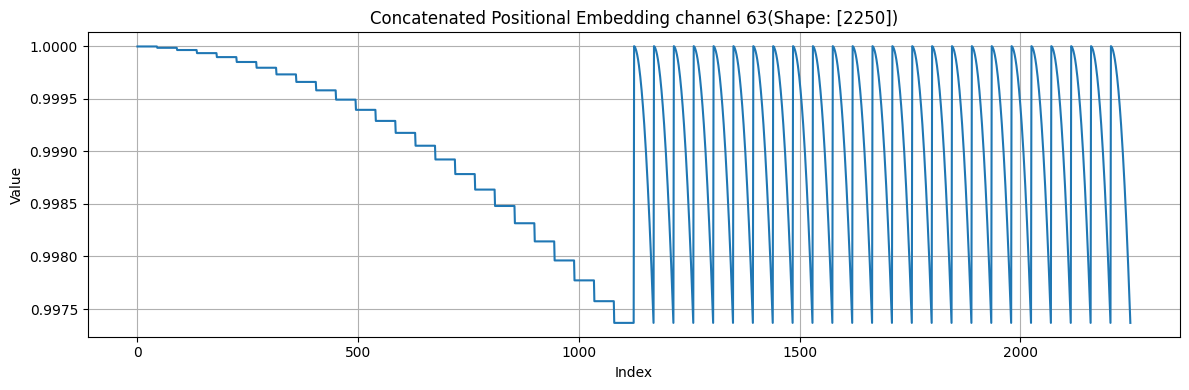

In [ ]:
concatenated64_pe = torch.cat((flattened64_y, flattened64_x), dim=0)  # Shape: [N, D_y + D_x]
print(concatenated64_pe)

print(concatenated64_pe.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(concatenated64_pe.numpy())
plt.title("Concatenated Positional Embedding channel 63(Shape: [2250])")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])
torch.Size([2250])


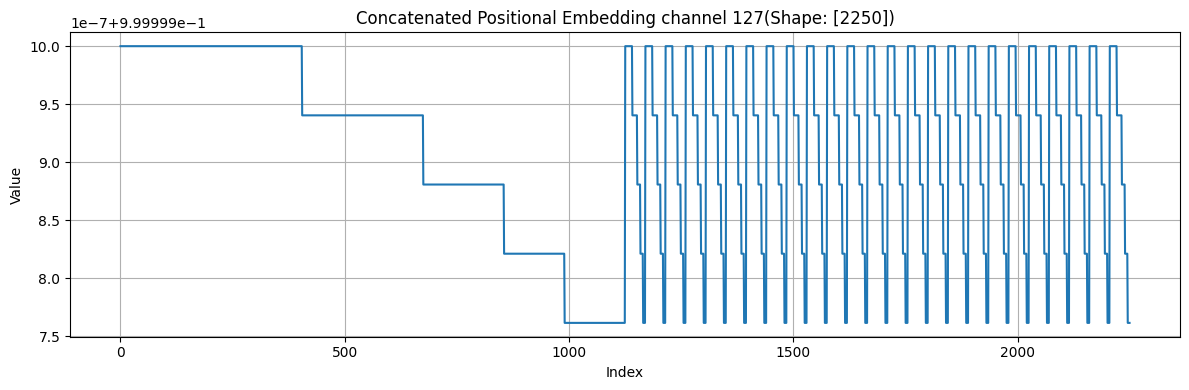

In [ ]:
concatenated127_pe = torch.cat((flattened127_y, flattened127_x), dim=0)  # Shape: [N, D_y + D_x]
print(concatenated127_pe)

print(concatenated127_pe.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(concatenated127_pe.numpy())
plt.title("Concatenated Positional Embedding channel 127(Shape: [2250])")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


tensor